<a href="https://colab.research.google.com/github/itissandeep98/ML-Assignments/blob/master/Assignment2/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import h5py 
import numpy as np
import pandas as pd
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import metrics 
from sklearn.manifold import TSNE
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression

## Pre Processing

In [ ]:
class MyPreProcessor():
  """
  My steps for pre-processing for the three datasets.
  """

  def __init__(self):
    pass

  def pre_process(self, dataset):
    """
    Reading the file and preprocessing the input and output.
    Note that you will encode any string value and/or remove empty entries in this function only.
    Further any pre processing steps have to be performed in this function too. 

    Parameters
    ----------

    dataset : integer with acceptable values 0, 1, or 2
    0 ->  Dataset
    1 ->  Dataset
    2 ->  Dataset

    Returns
    -------
    X : 2-dimensional numpy array of shape (n_samples, n_features)
    y : 1-dimensional numpy array of shape (n_samples,)
    """
    scaler = StandardScaler()
    if dataset == 0:
      df=h5py.File("/content/drive/My Drive/part_A_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])
      X = scaler.fit_transform(X)
    
    elif dataset == 1:
      df=h5py.File("/content/drive/My Drive/part_B_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])

    elif dataset == 2:
      df=pd.read_csv("/content/drive/My Drive/weight-height.csv")
      df['Gender'].replace('Male',0,inplace=True)
      df['Gender'].replace('Female',1,inplace=True)
      df['Height'],df['Weight']=df['Weight'].copy(),df['Height'].copy()
      df=df.sample(frac=1,random_state=4)
     
      X=df['Height'].to_numpy()
      X=np.reshape(X,(X.shape[0],1))
      y=df['Weight'].to_numpy()
    
    return X, y

## Q1

In [ ]:
def analysis(X_train, X_test, y_train, y_test):
  logistic = LogisticRegression(max_iter=10000)
  logistic.fit(X_train,y_train)
  y_pred=logistic.predict(X_test)

  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

  tsne = TSNE(n_components=2, verbose=2, n_iter=1000)
  tsne_results = tsne.fit_transform(X_train)

  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y_train,
    palette=sns.color_palette("hls", 10),
    legend="full"
  )

In [ ]:
def convert_n_to_1(mat):
  z=np.zeros((mat.shape[0]))
  for i in range(10):
    z[mat[:,i]==1]=i
  z=z.astype(int)
  return z

In [ ]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
y=convert_n_to_1(y)
print(X.shape,y.shape)

(4200, 784) (4200,)


### d)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)
freq = np.bincount(y_train)
items = np.nonzero(freq)[0]
print("size:",y_train.shape[0])
print(*list(zip(items,freq[items]))) 
freq = np.bincount(y_test)
items = np.nonzero(freq)[0]
print("size:",y_test.shape[0])
print(*list(zip(items,freq[items]))) 

size: 3360
(0, 320) (1, 395) (2, 315) (3, 339) (4, 333) (5, 318) (6, 353) (7, 345) (8, 328) (9, 314)
size: 840
(0, 80) (1, 99) (2, 78) (3, 85) (4, 83) (5, 80) (6, 88) (7, 86) (8, 82) (9, 79)


### e)

Accuracy: 0.8583333333333333
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.021s...
[t-SNE] Computed neighbors for 3360 samples in 1.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.463552
[t-SNE] Computed conditional probabilities in 0.216s
[t-SNE] Iteration 50: error = 84.0918198, gradient norm = 0.0061580 (50 iterations in 1.530s)
[t-SNE] Iteration 100: error = 78.5731049, gradient norm = 0.0026656 (50 iterations in 1.287s)
[t-SNE] Iteration 150: error = 78.4290314, gradient norm = 0.0002543 (50 iterations in 1.205s)
[t-SNE] Iteration 200: error = 78.4266510, gradient norm = 0.0000645 (50 iterations in 1.216s)
[t-SNE] Iteration 250: error = 78.4262543, gradient norm = 0.0001338 (50 iterations in 1.204s)
[t-SNE] KL

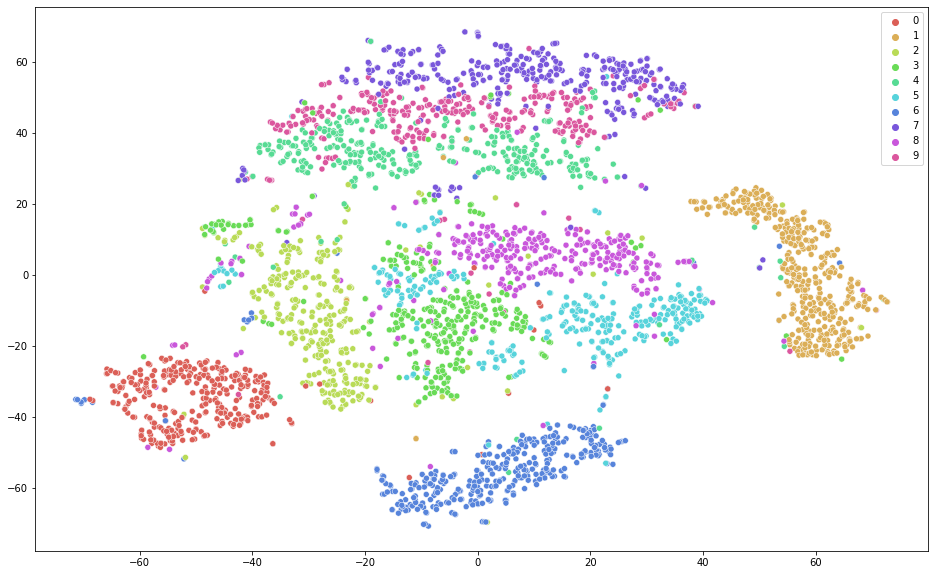

In [ ]:
pca = PCA(n_components=50) 
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 
analysis(X_train_pca, X_test_pca, y_train, y_test)

### f)

Accuracy: 0.8654761904761905
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.018s...
[t-SNE] Computed neighbors for 3360 samples in 1.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.477582
[t-SNE] Computed conditional probabilities in 0.194s
[t-SNE] Iteration 50: error = 84.0447540, gradient norm = 0.0095805 (50 iterations in 1.698s)
[t-SNE] Iteration 100: error = 78.6358643, gradient norm = 0.0037398 (50 iterations in 1.445s)
[t-SNE] Iteration 150: error = 78.3834381, gradient norm = 0.0009158 (50 iterations in 1.258s)
[t-SNE] Iteration 200: error = 78.3771210, gradient norm = 0.0001149 (50 iterations in 1.239s)
[t-SNE] Iteration 250: error = 78.3763275, gradient norm = 0.0000793 (50 iterations in 1.239s)
[t-SNE] KL

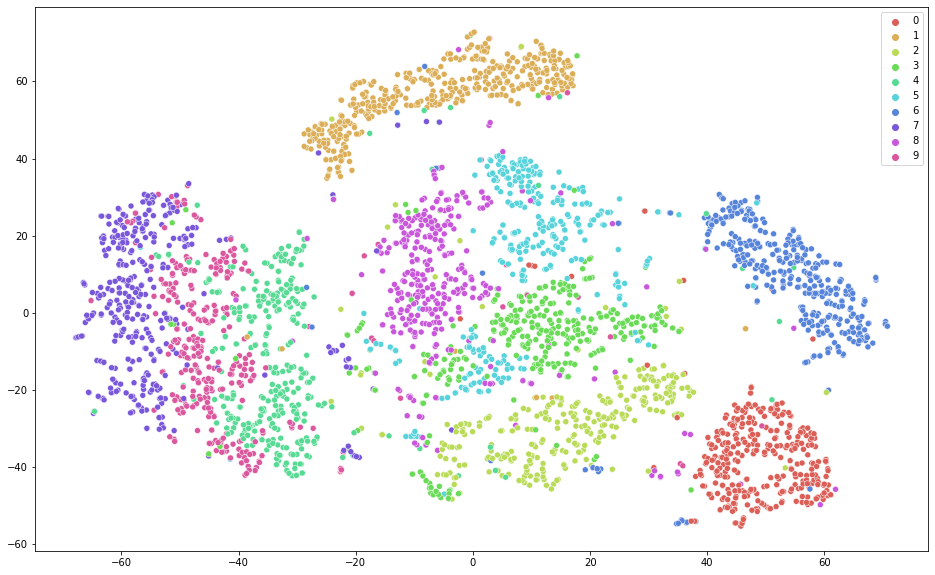

In [ ]:
svd = TruncatedSVD(n_components=50)
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.transform(X_test)
analysis(X_train_svd, X_test_svd, y_train, y_test)

## Q2

In [ ]:
def create_sample(X_train,y_train):
  y=np.array([])
  X=np.array([])
  
  for i in range(y_train.shape[0]):
    idx=np.random.randint(0,y_train.shape[0])
    X=np.append(X,X_train[idx])
    y=np.append(y,y_train[idx])
  X=X.reshape((X.shape[0],1))
  return X,y


In [ ]:
preprocessor= MyPreProcessor()
X,y=preprocessor.pre_process(2)
num_samples=100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

theta_list=[]
predictions=None
for _ in range(num_samples):
  X_temp,y_temp=create_sample(X_train,y_train)
  linear=LinearRegression()
  
  linear.fit(X_temp,y_temp)
  theta_list.append(np.array([linear.intercept_,*linear.coef_]))

  temp=X_test.dot(linear.coef_)+linear.intercept_
  temp=temp.reshape((temp.shape[0],1))
  if(predictions is not None):
    predictions=np.concatenate((predictions,temp),axis=1)
  else:
    predictions=temp
  
avg_pred=np.mean(predictions,axis=1)
diff=avg_pred-y_test

bias=np.sum(abs(diff))/X_test.shape[0]
variance=(np.sum((diff)**2)/(num_samples-1))/X_test.shape[0]
MSE=(1/num_samples)*np.sum(diff**2)
print("bias:",bias)
print("variance:",variance)
print("MSE:",MSE)
print(MSE-bias**2-variance)

bias: 1.2597099122213815
variance: 0.02348957955575194
MSE: 2.325468376019442
0.7151097335148895


## Q4

### SKlearn

In [ ]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
y=convert_n_to_1(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
metrics.accuracy_score(y_test, y_pred)

0.6452380952380953

### Custom

In [131]:
class NaiveBayes():
  def __init__(self):
    pass
  def calculate_probability(x, mean, var):
    exponent = exp(-((x-mean)**2 / (2 * var )))
    return (1 / (sqrt(2 * pi * var))) * exponent

  def calculate_stats(self,X):
    stats={}
    for col in range(X.shape[1]):
      stats[col]=[np.mean(X[:,col]),np.var(X[:,col]),X.shape[0]]

    return stats

  def separate_by_class(self,X,y):
    separated={}
    for i in range(X.shape[0]):
      if(y[i] in separated):
        separated[y[i]]=np.concatenate([separated[y[i]],[X[i]]])
      else:
        separated[y[i]]=[X[i]]
    
    return separated

  def fit(self,X,y):
      separated= self.separate_by_class(X,y)
      self.stats={}
      for label in separated:
        self.stats[label]=self.calculate_stats(separated[label])
        
      return self.stats

  def predict(self,X):
    pass

In [130]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
y=convert_n_to_1(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
nb=NaiveBayes()
nb.fit(X_train,y_train)
# nb.predict(X_test)

{0: {0: [0.0, 0.0, 367],
  1: [0.0, 0.0, 367],
  2: [0.0, 0.0, 367],
  3: [0.0, 0.0, 367],
  4: [0.0, 0.0, 367],
  5: [0.0, 0.0, 367],
  6: [0.0, 0.0, 367],
  7: [0.0, 0.0, 367],
  8: [0.0, 0.0, 367],
  9: [0.0, 0.0, 367],
  10: [0.0, 0.0, 367],
  11: [0.0, 0.0, 367],
  12: [-0.01543217226894309, 1.2037062152420224e-35, 367],
  13: [-0.01543217226894314, 3.009265538105056e-36, 367],
  14: [0.0, 0.0, 367],
  15: [0.0, 0.0, 367],
  16: [0.0, 0.0, 367],
  17: [0.0, 0.0, 367],
  18: [0.0, 0.0, 367],
  19: [0.0, 0.0, 367],
  20: [0.0, 0.0, 367],
  21: [0.0, 0.0, 367],
  22: [0.0, 0.0, 367],
  23: [0.0, 0.0, 367],
  24: [0.0, 0.0, 367],
  25: [0.0, 0.0, 367],
  26: [0.0, 0.0, 367],
  27: [0.0, 0.0, 367],
  28: [0.0, 0.0, 367],
  29: [0.0, 0.0, 367],
  30: [0.0, 0.0, 367],
  31: [0.0, 0.0, 367],
  32: [0.0, 0.0, 367],
  33: [0.0, 0.0, 367],
  34: [0.0, 0.0, 367],
  35: [-0.015432172268941143, 3.009265538105056e-36, 367],
  36: [-0.015432172268941776, 3.009265538105056e-36, 367],
  37: [-0.015